In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the training data
train_data = pd.read_csv('train.csv')

# Drop unnecessary columns (similar to your previous code)
train_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Convert categorical features to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})



In [2]:
# Split the data into features (X) and target (y)
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Build a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [3]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Drop unnecessary columns for the test set
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Handle missing values for the test set
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert categorical features to numerical for the test set
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})



In [4]:
# Make predictions on the test set
y_pred = rf_model.predict(test_data)



In [8]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [5]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


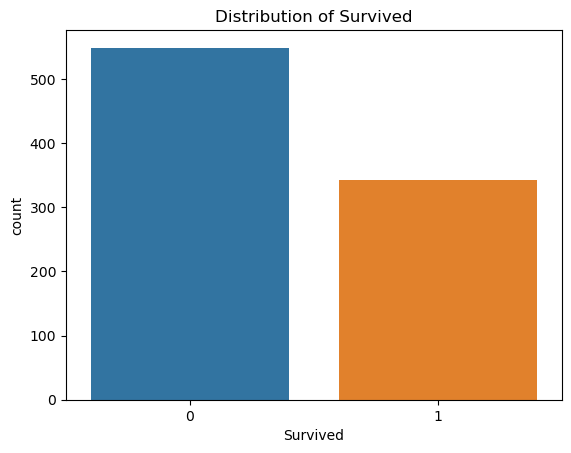

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()


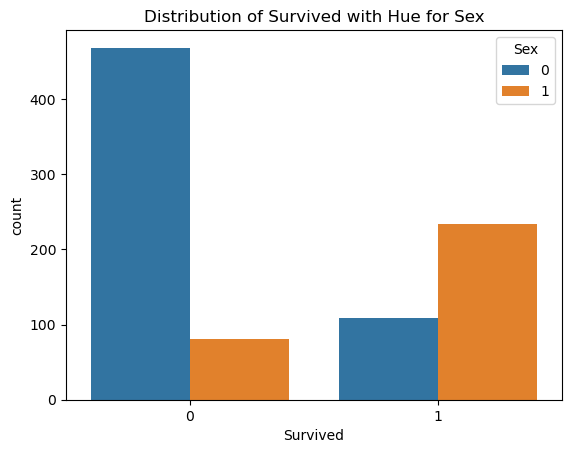

In [13]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Distribution of Survived with Hue for Sex')
plt.show()


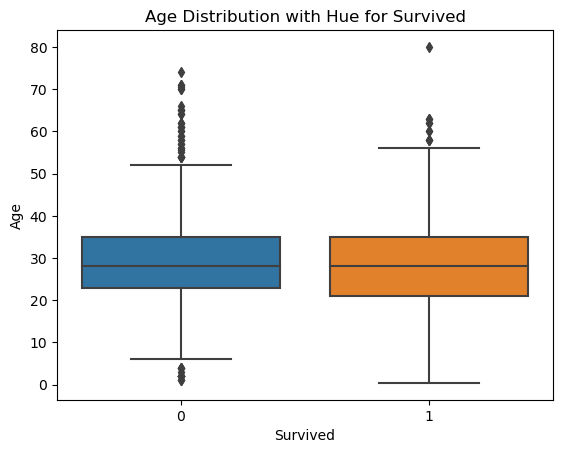

In [14]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution with Hue for Survived')
plt.show()


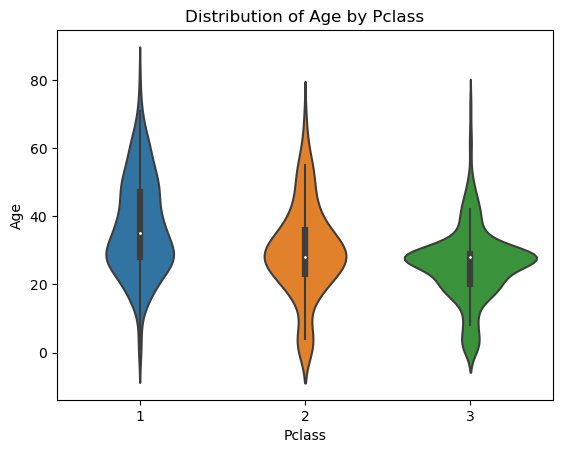

In [15]:
sns.violinplot(x='Pclass', y='Age', data=train_data)
plt.title('Distribution of Age by Pclass')
plt.show()


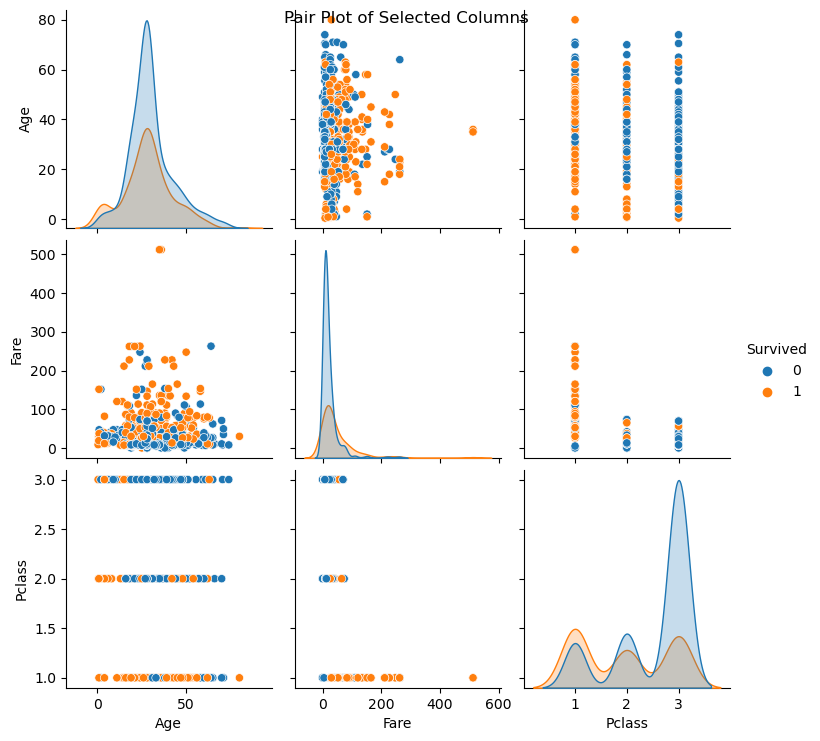

In [16]:
sns.pairplot(train_data[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle('Pair Plot of Selected Columns')
plt.show()


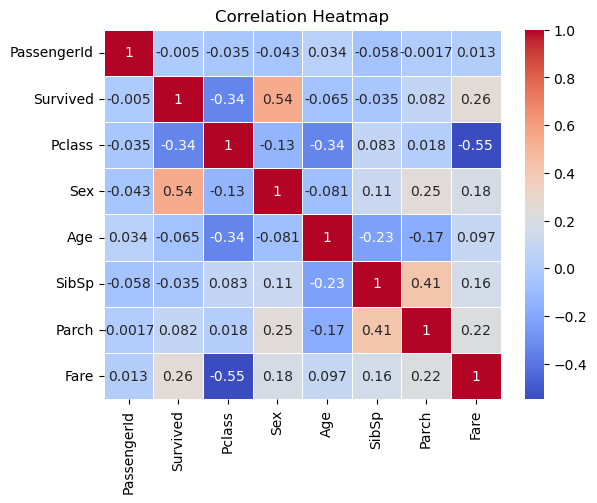

In [17]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


AttributeError: module 'seaborn' has no attribute 'factorplot'